In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina' # mac
%load_ext autoreload
%autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

METAGENOMES

In [16]:
#reading in the ranked list for metagenomes
rnk = pd.read_csv("./mtg_log2mean_ranklist.rnk", header=None, sep=",")

In [3]:
#Process gmt into a dictionary

with open('kegg_gene_set.gmt', 'r') as reader:
    lines = reader.readlines()
    
d = {}
for line in lines:
    line = line.strip().split(",")
    d[line[0]] = line[1:]

In [17]:
#running prerank on the metagenomes file
results = gp.prerank(rnk = rnk, gene_sets = d , permutation_num = 10, min_size = 0, max_size = 10000, verbose= True)

2021-08-09 13:31:52,546 Parsing data files for GSEA.............................
2021-08-09 13:32:03,967 0000 gene_sets have been filtered out when max_size=10000 and min_size=0
2021-08-09 13:32:03,968 0448 gene_sets used for further statistical testing.....
2021-08-09 13:32:03,970 Start to run GSEA...Might take a while..................
2021-08-09 13:32:21,460 Start to generate gseapy reports, and produce figures...
2021-08-09 13:32:38,637 Congratulations. GSEApy runs successfully................



In [23]:
results.res2d.sort_index().head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
ko00010,-0.155002,inf,NaN,0.687844,106,79,K13810;K15916;K02753;K12957;K00138;K01007;K040...,K00627;K01624;K06859;K02791;K00172;K00134;K027...
ko00020,0.206607,0.644210,1.0,1.000000,62,48,K18118;K00242;K00116;K01682;K00247;K00163;K059...,K18118;K00242;K00116;K01682
ko00030,-0.283645,-1.045695,0.0,0.783306,85,58,K13810;K15916;K17464;K00117;K01690;K05774;K163...,K06151;K06152;K15779;K00131;K00852;K01057;K080...
ko00040,-0.314879,inf,NaN,0.687844,85,57,K19588;K21619;K22935;K00039;K14274;K18107;K017...,K22994;K00880;K03079;K00963;K22396;K00007;K221...
ko00051,-0.213812,-0.677972,1.0,1.000000,111,84,K00064;K15916;K12660;K19270;K07026;K00863;K008...,K15856;K00007;K18335;K18334;K18333;K18338;K07046


In [24]:
terms = results.res2d.index
terms

Index(['ko00627', 'ko01054', 'ko04964', 'ko00970', 'ko00362', 'ko01040',
       'ko00473', 'ko03320', 'ko05210', 'ko05226',
       ...
       'ko05016', 'ko05017', 'ko05020', 'ko05134', 'ko05143', 'ko05150',
       'ko05166', 'ko05206', 'ko05208', 'ko05219'],
      dtype='object', name='Term', length=448)

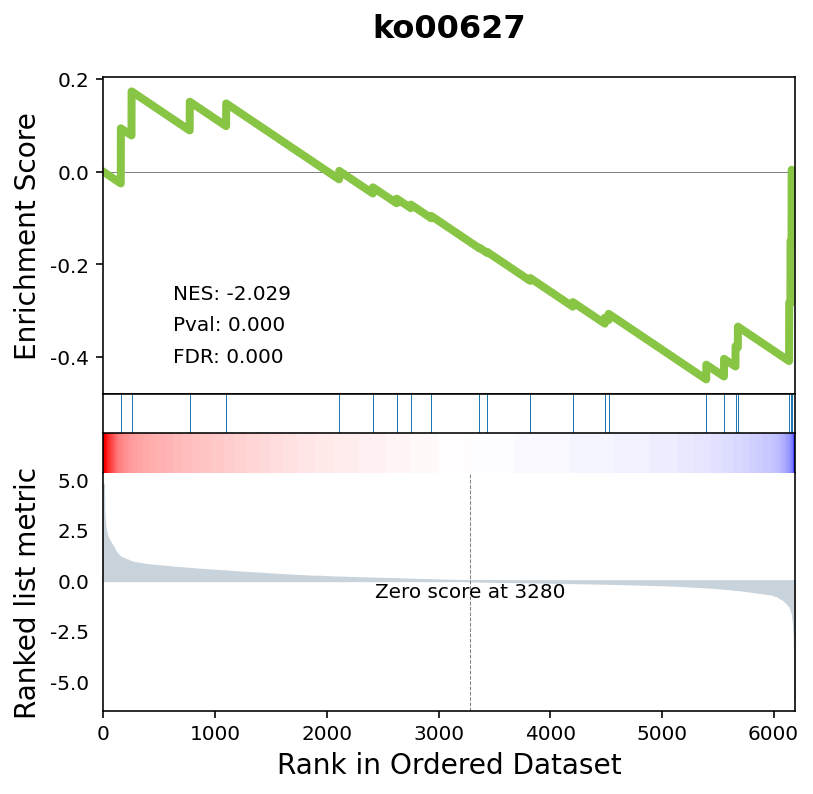

In [25]:
from gseapy.plot import gseaplot,heatmap

# to save your figure, make sure that ofname is not None
gseaplot(rank_metric=results.ranking, term=terms[0], **results.results[terms[0]])

METATRANSCIPTOMES

In [14]:
#reading the ranked file for the metatranscriptomes
rank = pd.read_csv("./mtt_log2mean_ranklist.rnk", header=None, sep=",")
rank.head()

,0,1
0,K00001,-0.130535
1,K00002,0.748205
2,K00003,0.311635
3,K00004,0.617569
4,K00005,0.140903


In [18]:
#running prerank on the metranscriptomes file
results2 = gp.prerank(rnk = rank, gene_sets = d, permutation_num = 10, min_size = 0, max_size = 10000, verbose= True, outdir = "metatranscriptomes/kegg_test_reports")

2021-08-09 13:32:58,601 Parsing data files for GSEA.............................
2021-08-09 13:33:12,988 0000 gene_sets have been filtered out when max_size=10000 and min_size=0
2021-08-09 13:33:12,988 0448 gene_sets used for further statistical testing.....
2021-08-09 13:33:12,988 Start to run GSEA...Might take a while..................
2021-08-09 13:33:28,873 Start to generate gseapy reports, and produce figures...
2021-08-09 13:33:48,830 Congratulations. GSEApy runs successfully................



In [19]:
#results after running prerank
results2.res2d.sort_index().head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
ko00010,0.181477,0.760780,1.0,0.959952,106,77,K22224;K16306;K02753;K00002;K02791;K06859;K157...,K22224;K16306;K02753;K00002;K02791;K06859;K157...
ko00020,-0.501819,-1.563174,0.0,0.030643,62,54,K00242;K05942;K01959;K01616;K00170;K01958;K001...,K00246;K00245;K00236;K15230;K01596;K00161;K001...
ko00030,0.331569,1.005590,0.0,0.879681,85,53,K01053;K00117;K16306;K19813;K13812;K06859;K157...,K01053;K00117;K16306;K19813;K13812;K06859;K157...
ko00040,0.337764,1.235918,0.0,0.647771,85,52,K22186;K13877;K22185;K22397;K21681;K00002;K008...,K22186;K13877;K22185;K22397;K21681;K00002;K008...
ko00051,0.247095,0.913058,0.5,0.945647,111,82,K18334;K16881;K12660;K16306;K18333;K01729;K008...,K18334;K16881;K12660;K16306;K18333;K01729;K008...


In [20]:
#enriched cohorts for metranscriptomes
terms_trans = results2.res2d.index
terms_trans

Index(['ko00195', 'ko03010', 'ko03015', 'ko03040', 'ko03050', 'ko04011',
       'ko04024', 'ko04071', 'ko04111', 'ko04113',
       ...
       'ko04950', 'ko05144', 'ko05310', 'ko05320', 'ko05321', 'ko05330',
       'ko05332', 'ko00361', 'ko00460', 'ko00471'],
      dtype='object', name='Term', length=448)